In [1]:
import numpy as np # for numerical operations
import pandas as pd # for handling input data
train = pd.read_csv('newtrain.csv') # uses pandas library to open a .csv file
test = pd.read_csv('newtest.csv')
sample = pd.read_csv('sample_submission.csv')

In [2]:
x=train.drop('abs_title_sentiment_polarity',axis=1)
label=train['abs_title_sentiment_polarity']
y=np.array(label)
x.shape

(8000, 55)

In [3]:
y=y.reshape(x.shape[0],1)
y.shape

(8000, 1)

In [4]:
b=np.ones((len(x),1))
b.shape

(8000, 1)

In [5]:
x=np.append(b,x,axis=1)
x.shape

(8000, 56)

In [6]:
def normal_equation(x,y,lamda):
    l=np.identity(x.shape[1])
    l[0,0]=0
    theta=np.dot(np.linalg.inv(x.T.dot(x)+lamda*l),x.T.dot(y))
    return theta

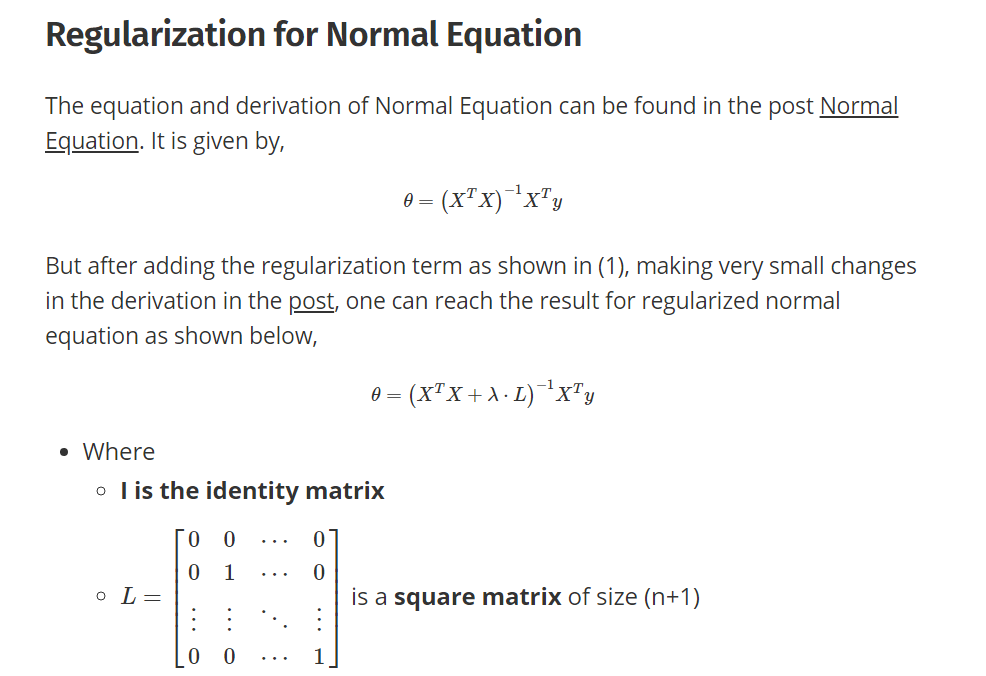

In [7]:
lamda=1
theta= normal_equation(x,y,lamda)
theta.shape

(56, 1)

In [8]:
theta

array([[ 3.17439886e-02],
       [ 3.09413342e-03],
       [-3.39779644e-07],
       [-1.42364817e-05],
       [-1.48412741e-03],
       [-4.81945628e-06],
       [ 1.82272473e-02],
       [ 1.71915909e-02],
       [-2.87752314e-02],
       [ 1.31840281e-05],
       [-6.99302757e-04],
       [ 1.88698465e-04],
       [-4.27202711e-04],
       [-9.83066030e-03],
       [ 1.26430138e-04],
       [ 2.92483760e-05],
       [ 1.95024070e-07],
       [ 9.99051931e-07],
       [-2.05041053e-08],
       [ 3.23949243e-09],
       [-3.15762404e-08],
       [ 3.59702710e-06],
       [-1.91672161e-07],
       [ 3.54197099e-06],
       [-5.95238572e-08],
       [-3.68475195e-08],
       [ 1.33874322e-07],
       [-7.95065087e-04],
       [-6.75380095e-03],
       [-6.17033785e-04],
       [ 1.65011758e-03],
       [ 3.77175442e-03],
       [-4.95166547e-03],
       [ 7.69569329e-03],
       [ 2.74402782e-03],
       [ 1.01727063e-02],
       [-5.90320507e-03],
       [-1.05783963e-02],
       [ 1.3

In [9]:
t=np.array(test)
b=np.ones((test.shape[0],1))
xfinal=np.append(b,t,axis=1)
xfinal.shape

(2000, 56)

In [13]:
test_pred=np.dot(xfinal,theta)
test_pred

array([[0.15451108],
       [0.0090556 ],
       [0.11845254],
       ...,
       [0.21922946],
       [0.26121021],
       [0.0227715 ]])

In [17]:
test_pred=test_pred.reshape(test_pred.shape[0],)

In [18]:
ids=np.array(sample['Id']) #prepare to submission
print(ids)

[   1    2    3 ... 1998 1999 2000]


In [19]:
e=pd.DataFrame({'Id':ids,'abs_title_sentiment_polarity':test_pred})
e.to_csv('newspaper_normal_eq.CSV',encoding='utf-8',index=False)